# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Parse the JSON and retrieve data
    response = requests.get(city_url)
    city_weather = response.json()
    
    # Run an API request for each of the cities
    try:

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | rawson
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | mournies
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | harrismith
Processing Record 10 of Set 1 | bitkine
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | bosaso
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | skelleftea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kirkland lake
Processing Record 19 of Set 1 | tan an
Processing Record 20 of Set 1 | mudgee
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | edinburgh of the seven seas
Processing Record 

Processing Record 40 of Set 4 | gueugnon
Processing Record 41 of Set 4 | howard springs
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | jijiga
Processing Record 44 of Set 4 | ust-nera
Processing Record 45 of Set 4 | afaahiti
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | den burg
Processing Record 49 of Set 4 | port mathurin
Processing Record 0 of Set 5 | badger
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | t'ongch'on-up
Processing Record 3 of Set 5 | hermanus
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | colonia
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | nikolayevsk-on-amure
Processing Record 8 of Set 5 | taghazout
Processing Record 9 of Set 5 | achacachi
Processing Record 10 of Set 5 | jayapura
Processing Record 11 of Set 5 | aykhal
Processing Record 12 of Set 5 | broome
Processing Record 13 of Set 5 | cal

Processing Record 28 of Set 8 | nova sintra
Processing Record 29 of Set 8 | scottburgh
Processing Record 30 of Set 8 | kish
Processing Record 31 of Set 8 | belmonte
Processing Record 32 of Set 8 | zouerate
Processing Record 33 of Set 8 | nizhnevartovsk
Processing Record 34 of Set 8 | santana
Processing Record 35 of Set 8 | dickinson
Processing Record 36 of Set 8 | tayoltita
Processing Record 37 of Set 8 | paracuru
Processing Record 38 of Set 8 | ketchikan
Processing Record 39 of Set 8 | taltal
Processing Record 40 of Set 8 | thief river falls
Processing Record 41 of Set 8 | mutuali
Processing Record 42 of Set 8 | nyala
Processing Record 43 of Set 8 | gisborne
Processing Record 44 of Set 8 | dese
Processing Record 45 of Set 8 | mount darwin
Processing Record 46 of Set 8 | bikenibeu village
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | gordonvale
Processing Record 0 of Set 9 | brookings
Processing Record 1 of Set 9 | as

City not found. Skipping...
Processing Record 17 of Set 12 | castillos
Processing Record 18 of Set 12 | imeni morozova
Processing Record 19 of Set 12 | oranjestad
Processing Record 20 of Set 12 | fastiv
Processing Record 21 of Set 12 | dongola
Processing Record 22 of Set 12 | arkhangel'sk
Processing Record 23 of Set 12 | hailey
Processing Record 24 of Set 12 | juliaca
Processing Record 25 of Set 12 | ridgecrest
Processing Record 26 of Set 12 | kabare
Processing Record 27 of Set 12 | faranah
Processing Record 28 of Set 12 | kitob
Processing Record 29 of Set 12 | saint-pierre
Processing Record 30 of Set 12 | valdosta
Processing Record 31 of Set 12 | umm kaddadah
Processing Record 32 of Set 12 | lerwick
Processing Record 33 of Set 12 | paros
Processing Record 34 of Set 12 | yangambi
Processing Record 35 of Set 12 | bairnsdale
Processing Record 36 of Set 12 | beloyarskiy
Processing Record 37 of Set 12 | yuzawa
Processing Record 38 of Set 12 | dar naim
City not found. Skipping...
Processing

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-3.40,91,94,3.79,GS,1691684773
1,karratha,-20.7377,116.8463,21.63,54,0,2.88,AU,1691684977
2,waitangi,-43.9535,-176.5597,10.46,80,77,7.49,NZ,1691684977
3,bethel,41.3712,-73.4140,26.37,76,0,2.06,US,1691684978
4,rawson,-43.3002,-65.1023,17.30,34,93,6.84,AR,1691684979


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-3.40,91,94,3.79,GS,1691684773
1,karratha,-20.7377,116.8463,21.63,54,0,2.88,AU,1691684977
2,waitangi,-43.9535,-176.5597,10.46,80,77,7.49,NZ,1691684977
3,bethel,41.3712,-73.4140,26.37,76,0,2.06,US,1691684978
4,rawson,-43.3002,-65.1023,17.30,34,93,6.84,AR,1691684979


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

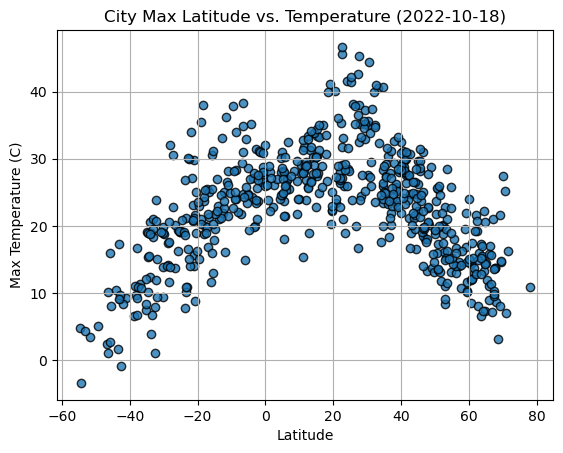

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

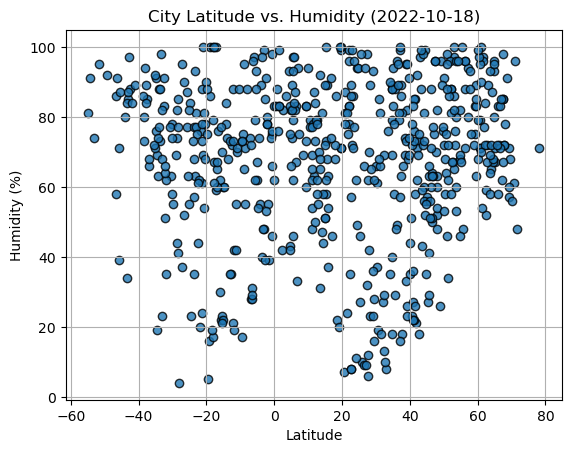

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

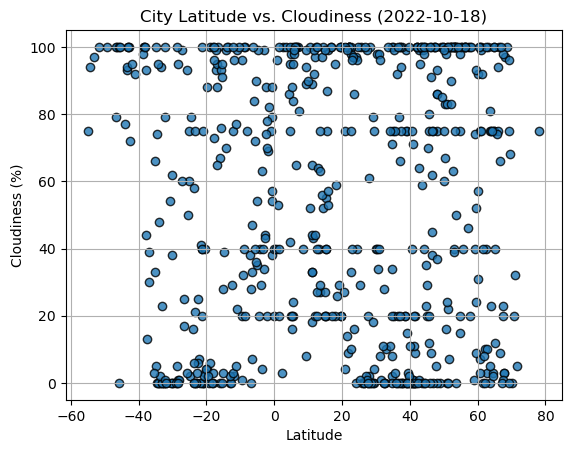

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

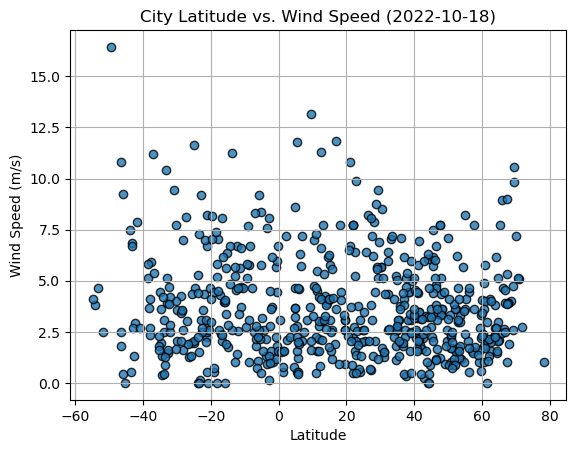

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    r_squared = rvalue**2
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the regression line equation and r squared value
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords="axes fraction")

    # Incorporate other graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Display plot
    print(f"The r-value is: {r_squared}")
    plt.show()


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bethel,41.3712,-73.4140,26.37,76,0,2.06,US,1691684978
5,whitehorse,60.7161,-135.0538,14.50,71,75,1.79,CA,1691684979
6,mournies,35.4764,24.0092,29.22,58,20,3.09,GR,1691684872
9,bitkine,11.9801,18.2138,26.88,73,97,2.79,TD,1691684980
10,longyearbyen,78.2186,15.6401,10.91,71,75,1.03,SJ,1691684981


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-3.40,91,94,3.79,GS,1691684773
1,karratha,-20.7377,116.8463,21.63,54,0,2.88,AU,1691684977
2,waitangi,-43.9535,-176.5597,10.46,80,77,7.49,NZ,1691684977
4,rawson,-43.3002,-65.1023,17.30,34,93,6.84,AR,1691684979
7,port-aux-francais,-49.3500,70.2167,5.10,92,100,16.44,TF,1691684980


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4057951863440207


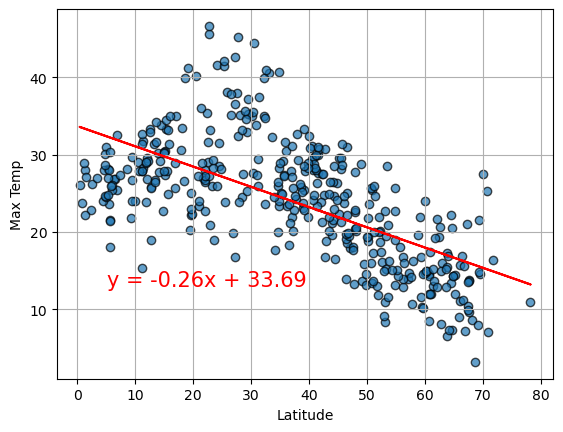

In [36]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                              northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temp",
                              (0.1, 0.25)
                             )


The r-value is: 0.5741239259532628


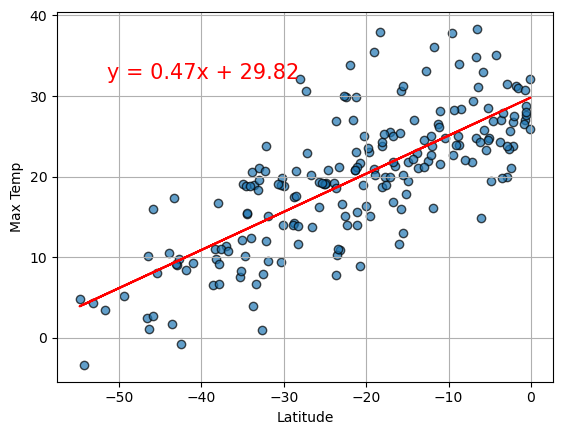

In [37]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                              southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temp",
                              (0.1, 0.82)
                             )

**Discussion about the linear relationship:** The linear regression on Northern Hemisphere data has a weak correlation, and the linear regression on the southern hemisphere data has moderate correlation. This may be due to the geography of both hemispheres where the northern hemisphere is more diverse due to various landmasses and different elevations and climate zones. These variations can lead to a wider range of temperature values in the northern hemisphere thus giving a weaker correlation. The southern hemisphere however, is ocean dominant and so having a moderate effect on the tempurature due to water's heat retaining capacity, thus leading to a more moderate correlation with tempurature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008440742613389918


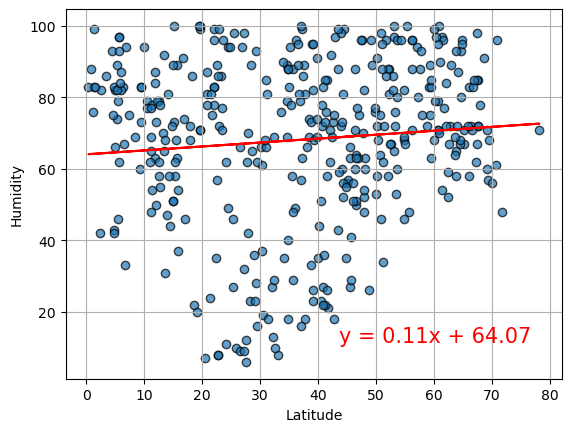

In [38]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                      northern_hemi_df["Humidity"], 
                      "Latitude", "Humidity",
                      (0.55, 0.1)
                     )

The r-value is: 0.03234174636858673


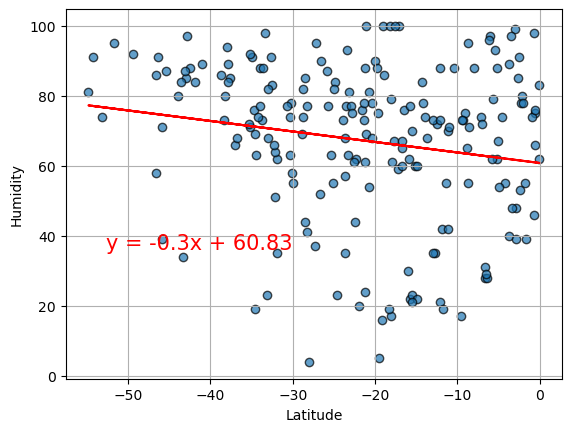

In [39]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                      southern_hemi_df["Humidity"],
                      "Latitude", "Humidity",
                      (0.08, 0.35)
                     )

**Discussion about the linear relationship:** There is no correlation between the northern and southern hemisphers humidity rates. This shows that humidity does not depend on latitude alone but rather on other factors instead. Such factors could be: air circulation, elevation, ocean influences, and season variations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003760755046815764


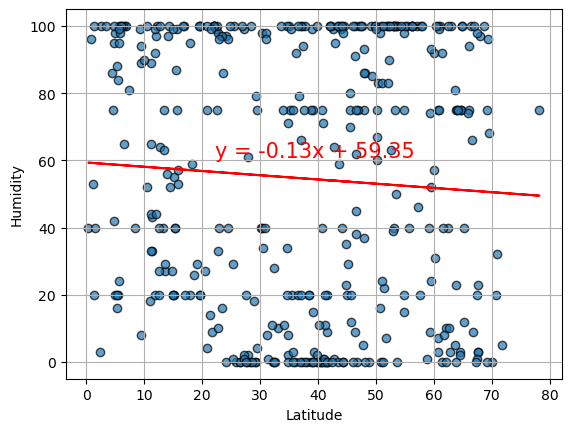

In [40]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                      northern_hemi_df["Cloudiness"], 
                      "Latitude", "Humidity",
                      (0.3, 0.6)
                     )

The r-value is: 0.006716514380857137


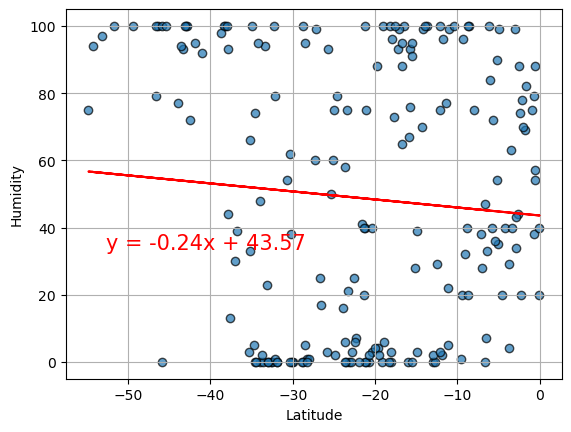

In [41]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                      southern_hemi_df["Cloudiness"],
                      "Latitude", "Humidity",
                      (0.08, 0.35)
                     )

**Discussion about the linear relationship:** Again, there is no correlation between cloudiness within the northern and southern hemisphers. This shows that cloudiness does not depend on latitude alone but rather on other factors instead. Such factors could be: Proximity to oceans, geography, ocean currents, and local climate zones.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005965213451491242


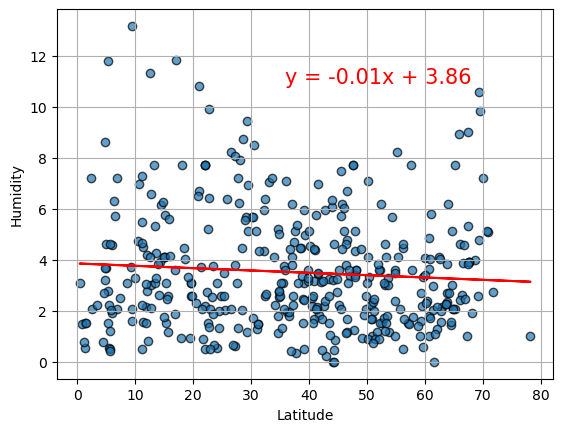

In [42]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], 
                      northern_hemi_df["Wind Speed"], 
                      "Latitude", "Humidity",
                      (0.46, 0.8)
                     )

The r-value is: 0.005530765308456057


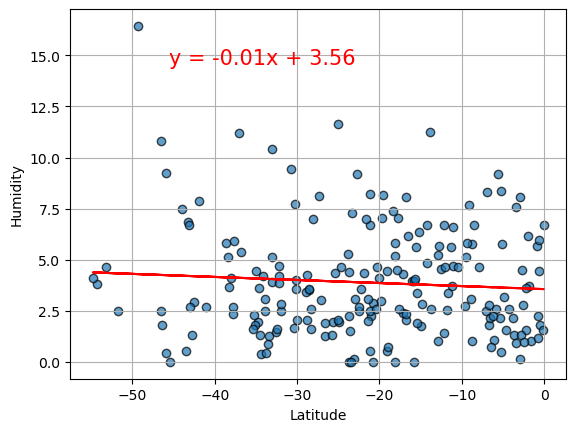

In [43]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], 
                      southern_hemi_df["Wind Speed"],
                      "Latitude", "Humidity",
                      (0.2, 0.85)
                     )

**Discussion about the linear relationship:** Once again, there seems to be no correlation between the Wind Speeds within the northern and southern hemisphers. This shows that wind speed does not depend on latitude alone but rather on other factors instead. Such factors could be:Geological features, oceans, the coriolis effect, and atmospheric circulation.